In [1]:
import pandas
%matplotlib inline

frame = pandas.read_csv('sample.csv')

#Setting appropiate datatypes
frame[['Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID']] = frame[['Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID']].astype('str')

frame[:5]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,31506,10,62.50,0,0.0,10
1,3,1110,7,3301,319641,2233,23,458.62,0,0.0,23
2,3,1110,7,3301,325070,1125,6,57.60,0,0.0,6
3,3,1110,7,3301,1307034,32933,1,7.04,0,0.0,1
4,3,1110,7,3301,2331717,1220,1,7.64,0,0.0,1


1000000 observaciones donde -2044 <= 'venta-dev' <= 3198
count    1000000.000000
mean           7.212642
std           21.987354
min        -2044.000000
25%            2.000000
50%            3.000000
75%            6.000000
max         3198.000000
Name: venta-dev, dtype: float64


/home/nbcommon/anaconda2_20/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


929448 observaciones donde -10 <= 'venta-dev' <= 18. 0.929448 del Total
count    929448.000000
mean          4.237707
std           3.704788
min         -10.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          18.000000
Name: venta-dev, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88d2844310>]], dtype=object)

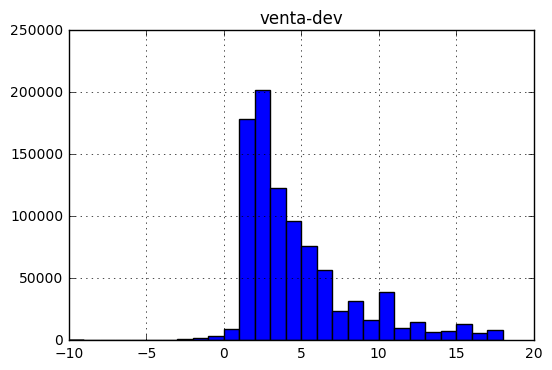

In [7]:
frame['venta-dev'] = frame['Venta_uni_hoy'] - frame['Dev_uni_proxima']
print "1000000 observaciones donde -2044 <= 'venta-dev' <= 3198"
print frame['venta-dev'].describe()

RIQ = 4
bigote_sup = 6 + 3*RIQ
bigote_inf = 2 - 3*RIQ

newframe = (frame[frame['venta-dev']>=bigote_inf])[frame['venta-dev']<=bigote_sup]
print "929448 observaciones donde -10 <= 'venta-dev' <= 18. 0.929448 del Total"
print newframe['venta-dev'].describe()
pandas.DataFrame.hist(newframe, 'venta-dev', bins=28)

# DEVUELVEN VS NO DEVUELVEN

In [2]:
no_devuelven = frame[frame['Dev_uni_proxima']==0] #965517
devuelven = frame[frame['Dev_uni_proxima']>0] #34483
devuelven_mas = frame[frame['Dev_uni_proxima']>frame['Venta_uni_hoy']] #8539
devuelven_menos = frame[frame['Dev_uni_proxima']<=frame['Venta_uni_hoy']][frame['Dev_uni_proxima']>0] #25944

C:\Users\user\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


# SAMPLING NO DEVUELVEN

In [7]:
import random

def simpleRandomSampling():
    """Simple Random Sampling (without replacement).
        List sequential algorithm: FAN-MULLER.
    """
    N = len(no_devuelven) #965517
    n = 45000 #34483
    nk = 0 #selected elems
    k = 0 #elem index
    indices = []

    while nk < n:
        k = k + 1
        p = (n - nk)/ float(N - k + 1) #probability of elem k
        newrandom = random.SystemRandom().random()
        if newrandom < p:
            nk = nk + 1
            indices.append(k-1)
    return indices
            
indices = simpleRandomSampling()
no_devuelven_sample = no_devuelven.iloc[indices]

# MODELO DESCRIPTIVO

In [13]:
from sklearn import tree
import numpy

X = pandas.concat([devuelven, no_devuelven_sample])
class1 =  numpy.ones(len(devuelven))
class2 = numpy.zeros(len(no_devuelven_sample))
Y = numpy.append(class1,class2)

In [14]:
dectree = tree.DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
dectree = dectree.fit(X,Y)

In [11]:
X['Devuelven'] = Y
X.to_csv('clasif.csv', encoding='utf-8')

In [18]:
dectree.predict(X.iloc[68000])

C:\Users\user\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.])

In [16]:
dectree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
no_devuelven.iloc[965516]

Semana                     9
Agencia_ID             25759
Canal_ID                   1
Ruta_SAK                5517
Cliente_ID           4388280
Producto_ID            32861
Venta_uni_hoy              4
Venta_hoy               24.8
Dev_uni_proxima            0
Dev_proxima                0
Demanda_uni_equil          4
Name: 999999, dtype: object